In [8]:
import torch

In [1]:
words = open('names.txt', 'r')
words = words.readlines()
words = [word.strip() for word in words]
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
# Convert each small alphabet to a number
stoi = {chr(i): i - 96 for i in range(97, 123)}
stoi = {**stoi, '.': 0}

In [6]:
itos = {v: k for k, v in stoi.items()}
itos[0] = '.'

In [12]:
xs , ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [13]:
len(xs), len(ys)

(5, 5)

In [14]:
import torch.nn.functional as F

In [21]:
xsenc = F.one_hot(xs, num_classes=len(stoi)).float()
xsenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
xsenc.shape

torch.Size([5, 27])

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

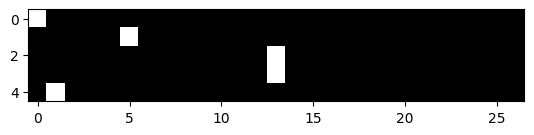

In [24]:
plt.imshow(xsenc, cmap='gray')

In [25]:
xsenc.dtype

torch.float32

In [46]:
g = torch.Generator().manual_seed(2147483647)

In [62]:
W = torch.randn(len(stoi), len(stoi), generator=g, requires_grad=True)

In [63]:
logits = xsenc @ W

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

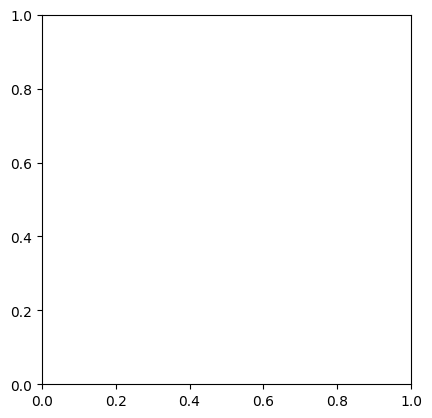

In [65]:
counts = logits.exp()
counts

tensor([[0.3209, 2.8249, 0.6830, 0.7708, 0.4068, 3.5116, 6.1745, 0.7929, 0.1641,
         1.2725, 1.0774, 1.0867, 2.0655, 0.5166, 3.3497, 5.5673, 0.5504, 0.4182,
         2.1804, 1.1062, 1.6890, 0.9447, 1.3622, 0.3811, 0.7179, 1.1966, 0.1623],
        [0.4842, 0.7570, 0.5186, 0.5675, 0.8128, 0.7640, 1.2280, 1.9870, 0.2025,
         1.4189, 7.6515, 1.5184, 0.4570, 2.2010, 4.7513, 0.3614, 1.3271, 0.1666,
         1.0854, 1.1066, 0.2569, 0.6308, 0.7241, 8.1489, 7.9424, 1.0199, 0.8980],
        [0.8382, 1.9532, 1.3001, 0.1803, 0.7093, 0.5697, 0.3943, 2.8374, 0.6202,
         0.4323, 0.9129, 4.5527, 2.2208, 1.8152, 1.6362, 2.6333, 1.3689, 1.1638,
         1.1663, 0.5607, 0.3926, 0.7776, 1.4241, 1.5881, 1.0215, 1.3093, 0.7558],
        [0.8382, 1.9532, 1.3001, 0.1803, 0.7093, 0.5697, 0.3943, 2.8374, 0.6202,
         0.4323, 0.9129, 4.5527, 2.2208, 1.8152, 1.6362, 2.6333, 1.3689, 1.1638,
         1.1663, 0.5607, 0.3926, 0.7776, 1.4241, 1.5881, 1.0215, 1.3093, 0.7558],
        [2.3917, 1.0144,

In [66]:
probs = counts / counts.sum(dim=1, keepdim=True) # Normalize called softmax output -> probabilities distribution
probs

tensor([[0.0078, 0.0684, 0.0165, 0.0187, 0.0099, 0.0850, 0.1495, 0.0192, 0.0040,
         0.0308, 0.0261, 0.0263, 0.0500, 0.0125, 0.0811, 0.1348, 0.0133, 0.0101,
         0.0528, 0.0268, 0.0409, 0.0229, 0.0330, 0.0092, 0.0174, 0.0290, 0.0039],
        [0.0099, 0.0155, 0.0106, 0.0116, 0.0166, 0.0156, 0.0251, 0.0406, 0.0041,
         0.0290, 0.1562, 0.0310, 0.0093, 0.0449, 0.0970, 0.0074, 0.0271, 0.0034,
         0.0222, 0.0226, 0.0052, 0.0129, 0.0148, 0.1663, 0.1621, 0.0208, 0.0183],
        [0.0239, 0.0556, 0.0370, 0.0051, 0.0202, 0.0162, 0.0112, 0.0808, 0.0177,
         0.0123, 0.0260, 0.1296, 0.0632, 0.0517, 0.0466, 0.0749, 0.0390, 0.0331,
         0.0332, 0.0160, 0.0112, 0.0221, 0.0405, 0.0452, 0.0291, 0.0373, 0.0215],
        [0.0239, 0.0556, 0.0370, 0.0051, 0.0202, 0.0162, 0.0112, 0.0808, 0.0177,
         0.0123, 0.0260, 0.1296, 0.0632, 0.0517, 0.0466, 0.0749, 0.0390, 0.0331,
         0.0332, 0.0160, 0.0112, 0.0221, 0.0405, 0.0452, 0.0291, 0.0373, 0.0215],
        [0.0597, 0.0253,

In [67]:
probs[0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [68]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item() #input
    y = ys[i].item() #output
    print(f'biagram example {i+1}: {itos[x]} -> {itos[y]} index {x} -> {y}')
    print(f'input to nn: {x}')
    print(f'output actual from nn: {y}')
    print(f'output probabilities: {probs[i]}')
    p = probs[i, y]
    print(f'output probabilities: {p.item():.4f}')
    logp = torch.log(p)
    print(f'output log likelihood: {logp.item():.4f}')
    nll = -logp
    print(f'negative log likelihood: {nll.item():.4f}')
    nlls[i] = nll
avg_nll = nlls.mean()
print(f'average negative log likelihood: {avg_nll.item():.4f}')
    

biagram example 1: . -> e index 0 -> 5
input to nn: 0
output actual from nn: 5
output probabilities: tensor([0.0078, 0.0684, 0.0165, 0.0187, 0.0099, 0.0850, 0.1495, 0.0192, 0.0040,
        0.0308, 0.0261, 0.0263, 0.0500, 0.0125, 0.0811, 0.1348, 0.0133, 0.0101,
        0.0528, 0.0268, 0.0409, 0.0229, 0.0330, 0.0092, 0.0174, 0.0290, 0.0039],
       grad_fn=<SelectBackward0>)
output probabilities: 0.0850
output log likelihood: -2.4646
negative log likelihood: 2.4646
biagram example 2: e -> m index 5 -> 13
input to nn: 5
output actual from nn: 13
output probabilities: tensor([0.0099, 0.0155, 0.0106, 0.0116, 0.0166, 0.0156, 0.0251, 0.0406, 0.0041,
        0.0290, 0.1562, 0.0310, 0.0093, 0.0449, 0.0970, 0.0074, 0.0271, 0.0034,
        0.0222, 0.0226, 0.0052, 0.0129, 0.0148, 0.1663, 0.1621, 0.0208, 0.0183],
       grad_fn=<SelectBackward0>)
output probabilities: 0.0449
output log likelihood: -3.1027
negative log likelihood: 3.1027
biagram example 3: m -> m index 13 -> 13
input to nn: 13
outpu

In [69]:
loss = -probs[range(len(xs)), ys].log().mean()
print(f'loss: {loss.item():.4f}')

loss: 2.8476


In [75]:
W.grad = None # set the gradient to zero
loss.backward()

In [76]:
W.grad.shape

torch.Size([27, 27])

In [77]:
W.data -= 0.1 * W.grad

In [78]:
logits = xsenc @ W
counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = -probs[range(len(xs)), ys].log().mean()
print(f'loss: {loss.item():.4f}')

loss: 2.8104


In [86]:
xs , ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [87]:
num = xs.nelement()
print(f'number of elements: {num}')
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(len(stoi), len(stoi), generator=g, requires_grad=True)

number of elements: 228146


In [94]:
for k  in range(100):
    xsenc = F.one_hot(xs, num_classes=len(stoi)).float()
    logits = xsenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean()+ 0.01*W.pow(2).mean()
    print(f'iteration {k}, loss: {loss.item():.4f}') 
    loss.backward()
    W.data -= 50 * W.grad
    W.grad = None

iteration 0, loss: 2.4833
iteration 1, loss: 2.4832
iteration 2, loss: 2.4832
iteration 3, loss: 2.4832
iteration 4, loss: 2.4831
iteration 5, loss: 2.4831
iteration 6, loss: 2.4831
iteration 7, loss: 2.4830
iteration 8, loss: 2.4830
iteration 9, loss: 2.4830
iteration 10, loss: 2.4830
iteration 11, loss: 2.4829
iteration 12, loss: 2.4829
iteration 13, loss: 2.4829
iteration 14, loss: 2.4829
iteration 15, loss: 2.4828
iteration 16, loss: 2.4828
iteration 17, loss: 2.4828
iteration 18, loss: 2.4828
iteration 19, loss: 2.4828
iteration 20, loss: 2.4827
iteration 21, loss: 2.4827
iteration 22, loss: 2.4827
iteration 23, loss: 2.4827
iteration 24, loss: 2.4827
iteration 25, loss: 2.4826
iteration 26, loss: 2.4826
iteration 27, loss: 2.4826
iteration 28, loss: 2.4826
iteration 29, loss: 2.4826
iteration 30, loss: 2.4826
iteration 31, loss: 2.4825
iteration 32, loss: 2.4825
iteration 33, loss: 2.4825
iteration 34, loss: 2.4825
iteration 35, loss: 2.4825
iteration 36, loss: 2.4825
iteration 3

In [95]:
# sample from the model
for _ in range(10):
    x = torch.tensor([0]) # start with '.'
    for _ in range(10):
        xenc = F.one_hot(x, num_classes=len(stoi)).float()
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(dim=1)
        y = torch.multinomial(probs[0], 1)
        if y == 0:
            break
        print(itos[y.item()], end='')
        x = y

    print()

zy
mallen
ddealy
kelen
a
sqwigh
kh
shannilman
ah
ya
